## What is the purpose of feature selection?

Usually, feature selections are typically implemented in predictive models to help determine a candidate model with good bias/variance trade off. They can also applied in logistic regression setting as well as multiple linear regression.

In [73]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import seaborn as sns
from sklearn.linear_model import Lasso

In [4]:
boston_data = load_boston()
boston_data

D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston_data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
boston['MEDV'] = boston_data.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
rad = pd.get_dummies(boston.RAD)
boston = boston.drop(columns = "RAD").merge(rad, left_index = True, right_index = True)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,24.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,273.0,21.0,...,22.4,1,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,...,20.6,1,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,...,23.9,1,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,...,22.0,1,0,0,0,0,0,0,0,0


In [15]:
boston.columns

Index([   'CRIM',      'ZN',   'INDUS',    'CHAS',     'NOX',      'RM',
           'AGE',     'DIS',     'TAX', 'PTRATIO',       'B',   'LSTAT',
          'MEDV',       1.0,       2.0,       3.0,       4.0,       5.0,
             6.0,       7.0,       8.0,      24.0],
      dtype='object')

In [25]:
x = boston.drop(columns = "MEDV")
y = boston.MEDV

### Filter Features by Variance
Checking variance of the variables.
Low variance, close to zero, the value will always the same which makes the variable not a good predictor.

In [20]:
boston.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
MEDV          84.586724
1.0            0.038039
2.0            0.045271
3.0            0.069597
4.0            0.170469
5.0            0.175968
6.0            0.048840
7.0            0.032532
8.0            0.045271
24.0           0.193198
dtype: float64

In [26]:
x = x.drop(columns = ["NOX", "CHAS"])

In [39]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
pred = cross_val_predict(classifier_pipeline, x, y, cv = cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y, pred)), 2)))
print("R squared: " + str(round(r2_score(y, pred), 2)))

RMSE: 5.07
R squared: 0.7


D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', '

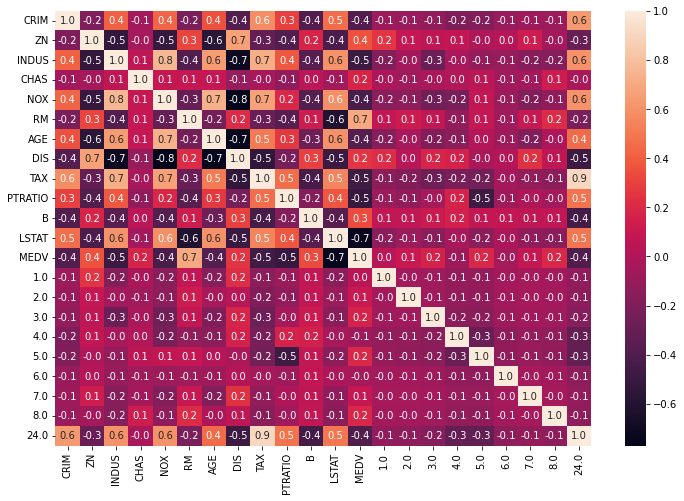

In [72]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sn.heatmap(boston.corr(), ax = ax, annot=True, fmt=".1f")
plt.show()

In [42]:
abs(boston.corr()["MEDV"])

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
1.0        0.040453
2.0        0.104444
3.0        0.167352
4.0        0.065711
5.0        0.187356
6.0        0.039411
7.0        0.092802
8.0        0.190053
24.0       0.396297
Name: MEDV, dtype: float64

In [51]:
vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
for val in vals:
    feature = abs(boston.corr()["MEDV"][abs(boston.corr()["MEDV"]) > val].drop("MEDV")).index.tolist()
    print(feature)
    
    x = boston.drop(columns = "MEDV")
    x = x[feature]
    
    pred = cross_val_predict(classifier_pipeline, x, y, cv = cv)
    print("RMSE: " + str(round(sqrt(mean_squared_error(y, pred)), 2)))
    print("R squared: " + str(round(r2_score(y, pred), 2)))
    

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 2.0, 3.0, 5.0, 8.0, 24.0]
RMSE: 5.14
R squared: 0.69
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 24.0]
RMSE: 4.42
R squared: 0.77
['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT', 24.0]


D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', '

D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', '

RMSE: 4.33
R squared: 0.78
['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
RMSE: 4.28
R squared: 0.78
['RM', 'PTRATIO', 'LSTAT']
RMSE: 4.3
R squared: 0.78
['RM', 'LSTAT']
RMSE: 4.54
R squared: 0.76
['LSTAT']
RMSE: 5.41
R squared: 0.65


Variables with the lowest RMSE, 4.28, and highest R-squared, 0.78, were 'RM', 'PTRATIO', and 'LSTAT'.

### Feature Selection Using a Wrapper
Sequential Feature Selection

In [55]:
boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
boston['MEDV'] = boston_data.target
rad = pd.get_dummies(boston.RAD)
boston = boston.drop(columns = "RAD").merge(rad, left_index = True, right_index = True)
x = boston.drop(columns = "MEDV")
y = boston.MEDV

**Forward Selection**

In [56]:
fs = SFS(classifier_pipeline,
        k_features = 13,
        forward = True,
        scoring = 'neg_mean_squared_error',
        cv = cv)

x = boston.drop(columns = "MEDV")

fs.fit(x, y)
fs.subsets_

{1: {'feature_idx': (11,),
  'cv_scores': array([-34.64918627, -34.27740588, -20.46438627, -33.73416471,
         -21.27936667, -20.68284314, -26.879436  , -30.54303   ,
         -49.324174  , -21.444294  ]),
  'avg_score': -29.32782869411765,
  'feature_names': ('LSTAT',)},
 2: {'feature_idx': (5, 11),
  'cv_scores': array([-40.28273137, -17.3283451 , -16.87722549,  -8.98089608,
         -23.57910196, -12.06788235, -17.998684  , -41.885448  ,
         -18.271946  ,  -9.099978  ]),
  'avg_score': -20.637223835294115,
  'feature_names': ('RM', 'LSTAT')},
 3: {'feature_idx': (4, 5, 11),
  'cv_scores': array([-38.49627059, -15.79957451,  -9.22429804,  -6.51962745,
         -24.71579412,  -9.34734118, -12.827238  , -32.67639   ,
         -12.660376  ,  -8.368308  ]),
  'avg_score': -17.063521788235295,
  'feature_names': ('NOX', 'RM', 'LSTAT')},
 4: {'feature_idx': (4, 5, 11, 17),
  'cv_scores': array([-38.47574902, -14.58978627,  -9.00603333,  -6.14379804,
         -24.99877059,  -9.37239

In [60]:
x = boston.drop(columns = "MEDV")[['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'B', 'LSTAT', 6.0]]
y = boston["MEDV"]
pred = cross_val_predict(classifier_pipeline, x, y, cv = cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y, pred)), 2)))
print("R squared: " + str(round(r2_score(y, pred), 2)))

RMSE: 3.96
R squared: 0.81


D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', '

**Backward Selection**

In [58]:
fs = SFS(classifier_pipeline,
        k_features = 1,
        forward = False,
        scoring = 'neg_mean_squared_error',
        cv = cv)

x = boston.drop(columns = "MEDV")

fs.fit(x, y)
fs.subsets_

{21: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20),
  'cv_scores': array([-48.59168039, -41.71460196, -26.77341373, -18.77266275,
         -17.19804314, -21.57217647, -20.388668  , -42.540924  ,
         -36.872014  , -15.978064  ]),
  'avg_score': -29.040224843137253,
  'feature_names': ('CRIM',
   'ZN',
   'INDUS',
   'CHAS',
   'NOX',
   'RM',
   'AGE',
   'DIS',
   'TAX',
   'PTRATIO',
   'B',
   'LSTAT',
   1.0,
   2.0,
   3.0,
   4.0,
   5.0,
   6.0,
   7.0,
   8.0,
   24.0)},
 20: {'feature_idx': (0,
   1,
   2,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20),
  'cv_scores': array([-50.55976078, -37.94587451, -25.38272745, -17.01997843,
         -12.40205882, -18.35837255, -15.604718  , -36.948534  ,
         -32.602062  , -14.400774  ]),
  'avg_score': -26.12248605490196,
  'feature_names': ('CRIM',
   'ZN',
  

In [61]:
x = boston.drop(columns = "MEDV")[['CRIM', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT', 6.0, 24.0]]
y = boston["MEDV"]
pred = cross_val_predict(classifier_pipeline, x, y, cv = cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y, pred)), 2)))
print("R squared: " + str(round(r2_score(y, pred), 2)))

RMSE: 3.91
R squared: 0.82


D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
D:\Project\Machine Learning\machinelearning\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', '

Forwad and Backward selection gave a different set of explanatory variables but extremely similar RMSE. Since Forward

In [64]:
boston[['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'B', 'LSTAT', 6.0, "MEDV"]].corr()

,CRIM,NOX,RM,AGE,DIS,B,LSTAT,6.0,MEDV
CRIM,1.000000,0.420972,-0.219247,0.352734,-0.379670,-0.385064,0.455621,-0.093806,-0.388305
NOX,0.420972,1.000000,-0.302188,0.731470,-0.769230,-0.380051,0.590879,-0.080115,-0.427321
RM,-0.219247,-0.302188,1.000000,-0.240265,0.205246,0.128069,-0.613808,-0.059651,0.695360
AGE,0.352734,0.731470,-0.240265,1.000000,-0.747881,-0.273534,0.602339,-0.069790,-0.376955
DIS,-0.379670,-0.769230,0.205246,-0.747881,1.000000,0.291512,-0.496996,0.025432,0.249929
B,-0.385064,-0.380051,0.128069,-0.273534,0.291512,1.000000,-0.366087,0.078322,0.333461
LSTAT,0.455621,0.590879,-0.613808,0.602339,-0.496996,-0.366087,1.000000,-0.011330,-0.737663
6.0,-0.093806,-0.080115,-0.059651,-0.069790,0.025432,0.078322,-0.011330,1.000000,-0.039411
MEDV,-0.388305,-0.427321,0.695360,-0.376955,0.249929,0.333461,-0.737663,-0.039411,1.000000


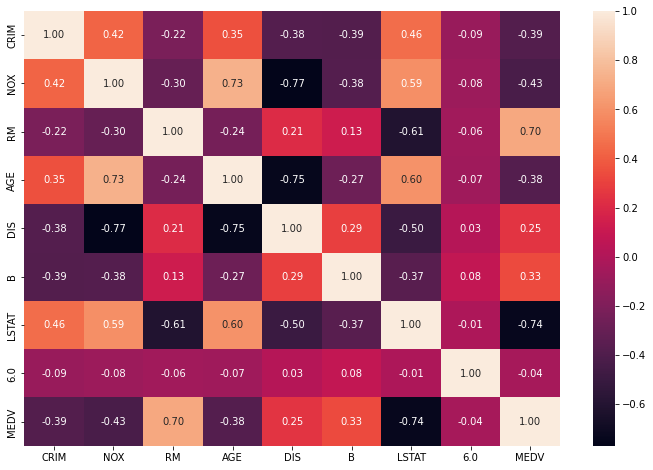

In [70]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sn.heatmap(boston[['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'B', 'LSTAT', 6.0, "MEDV"]].corr(), ax = ax, annot=True, fmt=".2f")
plt.show()


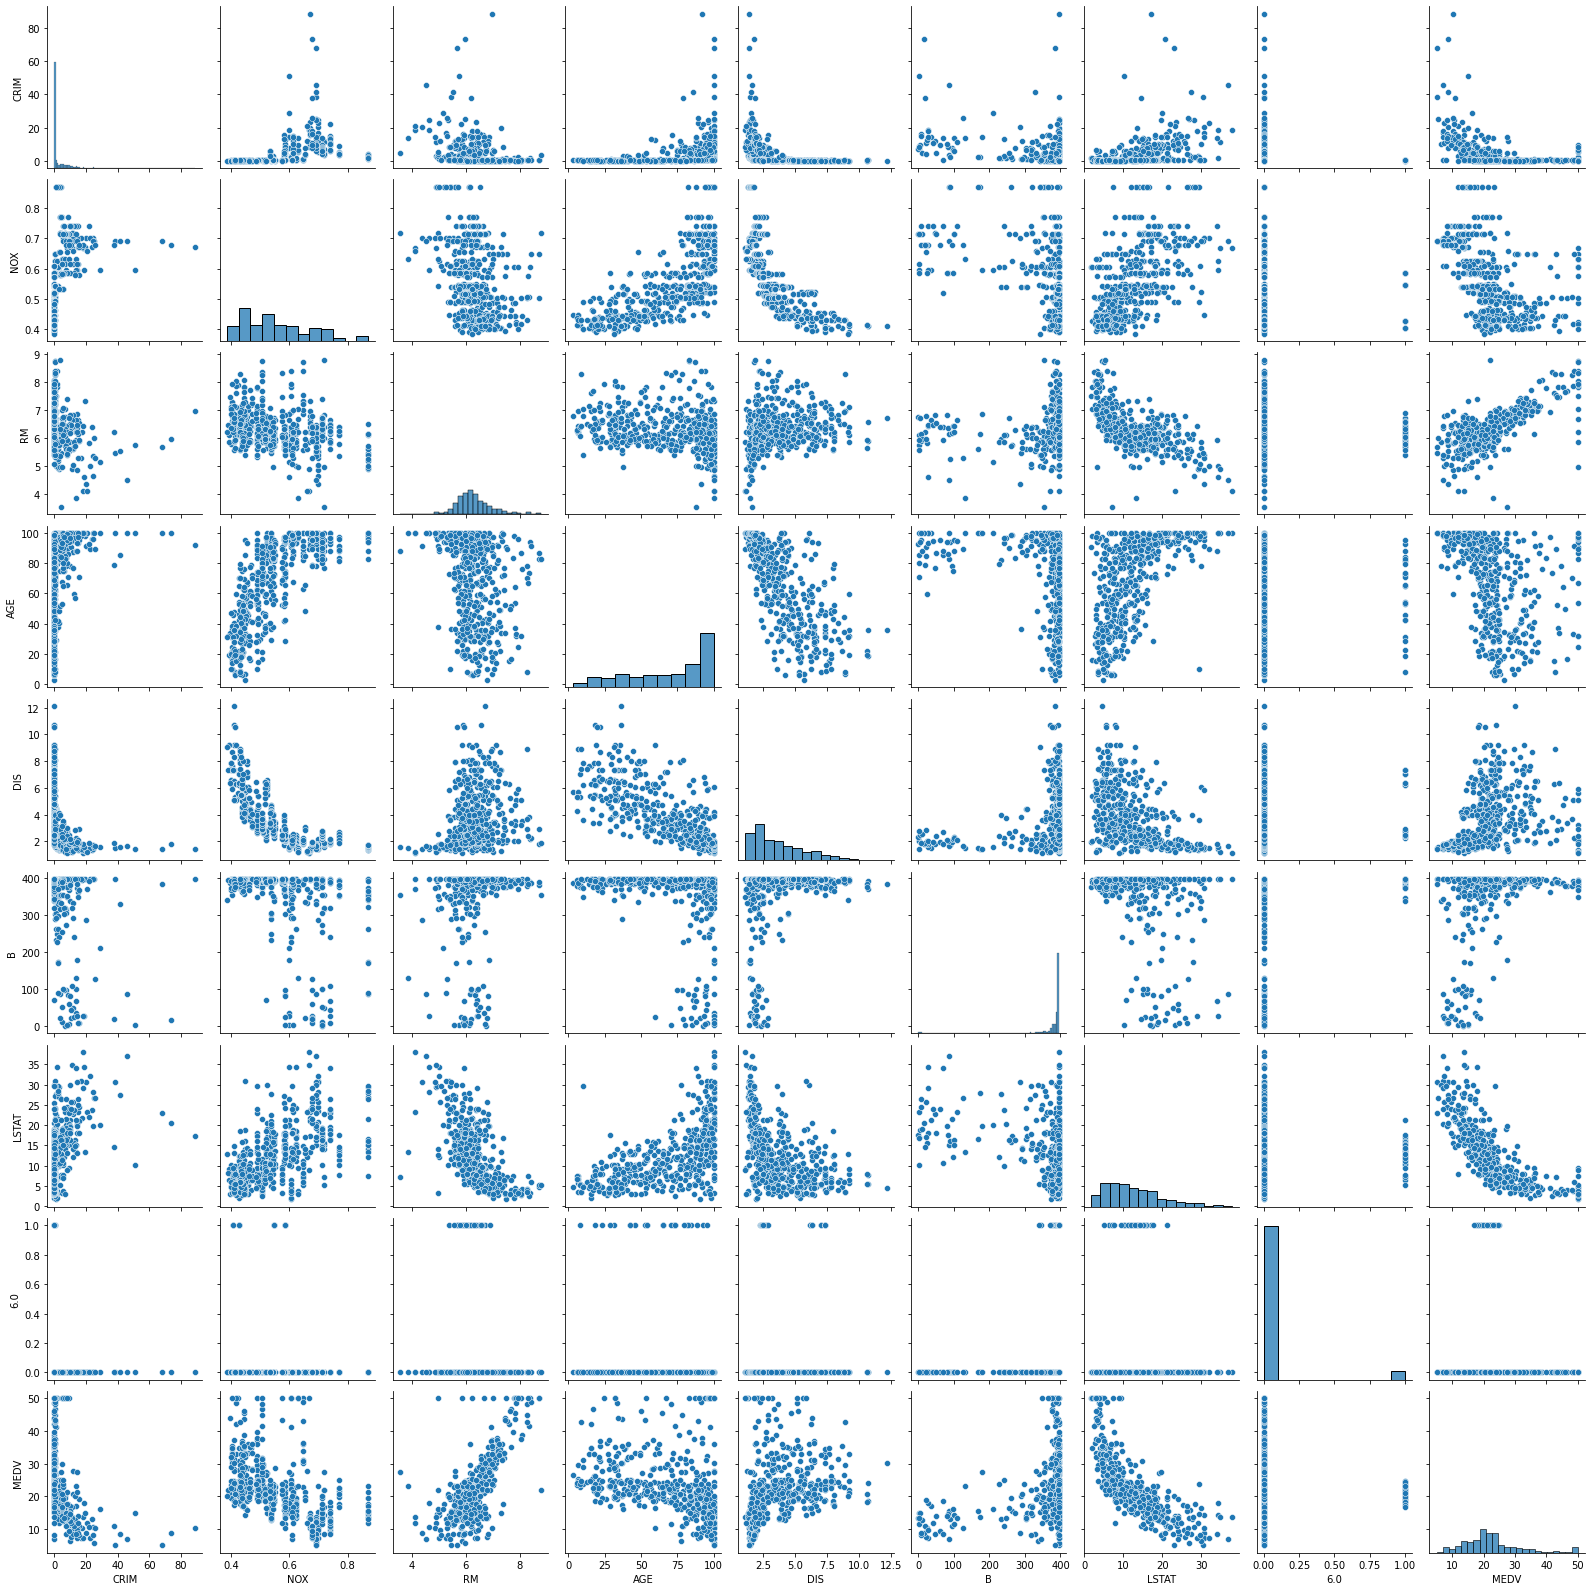

In [68]:
sns.pairplot(boston[['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'B', 'LSTAT', 6.0, "MEDV"]])

### Multicollinearity
We are observing a Multicollinearity issue and there is a number of ways to solve this issue.

We could simply drop the one of the variables, however, this only works for a small set of dataset.

It would be ideal to capitalize all the data we have so what would be a better approach?\
**We could either create a complex model but it would be difficult to interpret it. We could also consider using Lasso.**

In [74]:
# to be continue...
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html